# Trabalho Prático 3 - Machine Learning

1. Implementação redes neurais do tipo Multilayer Perceptron, utilizando o framework
Keras/Tensorflow, para obtenção de um modelo de classificação.

In [86]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

In [159]:
class MLPClassifier:
    def __init__(
        self,
        input_shape,
        num_classes,
        hidden_layers=[128, 64],
        activation="relu",
        optimizer="adam",
        epochs=10, 
        batch_size=32,
        loss="mean_squared_error",
        metrics=["accuracy"],
    ):
        self.input_shape = input_shape
        self.num_classes = num_classes
        self.hidden_layers = hidden_layers
        self.activation = activation
        self.optimizer = optimizer
        self.epochs = epochs
        self.batch_size=batch_size
        self.loss = loss
        self.metrics = metrics
        self.model = self.build_model()
        self.history = None

    def build_model(self):
        model = Sequential()
        model.add(Flatten(input_shape=self.input_shape))  # Camada de entrada
        for units in self.hidden_layers:
            model.add(Dense(units, activation=self.activation))  # Camadas ocultas
        model.add(Dense(self.num_classes, activation="softmax"))  # Camada de saída
        model.compile(optimizer=self.optimizer, loss=self.loss, metrics=self.metrics)
        return model

    def train(self, x_train, y_train, x_val, y_val):
        self.history = self.model.fit(
            x_train,
            y_train,
            epochs=self.epochs,
            batch_size=self.batch_size,
            validation_data=(x_val, y_val),
        )

    def evaluate(self, x_test, y_test):
        test_loss, test_acc = self.model.evaluate(x_test, y_test)
        print(f"\nTest accuracy: {test_acc}")
        return test_loss, test_acc

    def predict(self, x):
        return self.model.predict(x)

    def plot_metrics(self):
        """
        Gerar gráfico para visualização das curvas de perda e acurácia do módelo
        após as etapas de treinamento e validação

        """
        if self.history is None:
            raise ValueError(
                "Model has not been trained yet. Please call the `train` method first."
            )

        training_loss = self.history.history["loss"]
        validation_loss = self.history.history["val_loss"]

        training_accuracy = self.history.history["accuracy"]
        validation_accuracy = self.history.history["val_accuracy"]

        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        plt.plot(training_loss, marker="o")
        plt.plot(validation_loss, marker="o")
        plt.title("Perda do Modelo")
        plt.ylabel("Perda")
        plt.xlabel("Época")
        plt.legend(["Treino", "Validação"], loc="upper left")

        # Plot training & validation accuracy values
        plt.subplot(1, 2, 2)
        plt.plot(training_accuracy, marker="o")
        plt.plot(validation_accuracy, marker="o")
        plt.title("Acurácia do Modelo")
        plt.ylabel("Acurácia")
        plt.xlabel("Época")
        plt.legend(["Treino", "Validação"], loc="upper left")

        plt.show()

In [155]:
def grid_params():

  # Definir os parâmetros do grid
  param_grid = {
      "hidden_layers": [[128, 64], [256, 128, 64], [128, 64, 32]],
      "activation": ["relu", "tanh"],
      "optimizer": ["adam", "rmsprop"],
      "epochs": [10, 20],
      "batch_size": [32, 64],
  }

  i_params = iter(param_grid)
  param = next(i_params)
  param2 = next(i_params)
  param3 = next(i_params)
  param4 = next(i_params)
  param5 = next(i_params)

  params = []
  for i in range(len(param_grid)):
      values = param_grid[param]
      for v in values:
          values2 = param_grid[param2]
          for v2 in values2:
              values3 = param_grid[param3]
              for v3 in values3:
                  values4 = param_grid[param4]
                  for v4 in values4:
                      values5 = param_grid[param5]
                      for v5 in values5:
                          params.append((v, v2, v3, v4, v5))
                          
  return params,param_grid.keys()

values,cols = grid_params()
pd.DataFrame(values,columns=cols)

,hidden_layers,activation,optimizer,epochs,batch_size
0,"[128, 64]",relu,adam,10,32
1,"[128, 64]",relu,adam,10,64
2,"[128, 64]",relu,adam,20,32
3,"[128, 64]",relu,adam,20,64
4,"[128, 64]",relu,rmsprop,10,32
...,...,...,...,...,...
235,"[128, 64, 32]",tanh,adam,20,64
236,"[128, 64, 32]",tanh,rmsprop,10,32
237,"[128, 64, 32]",tanh,rmsprop,10,64
238,"[128, 64, 32]",tanh,rmsprop,20,32


### Base de Dados German Credit

In [201]:
# Carregar a base de dados German Credit
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data"
columns = [
    "status",
    "month",
    "credit_history",
    "purpose",
    "credit_amount",
    "savings",
    "employment",
    "installment_rate",
    "personal_status_sex",
    "other_debtors",
    "residence_since",
    "property",
    "age",
    "other_installment_plans",
    "housing",
    "number_credits",
    "job",
    "people_liable",
    "telephone",
    "foreign_worker",
    "target",
]
data = pd.read_csv(url, delim_whitespace=True, header=None, names=columns)

# Pre-processamento dos dados
# Codificar variáveis categóricas
for col in data.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

# Separar as features e o target
X = data.drop("target", axis=1)
y = data["target"] - 1  # Ajustar as labels para que sejam 0 e 1

# Normalizar as features
scaler = StandardScaler()
X = scaler.fit_transform(X)


# Dividir os dados em treino (60%), validação (20%) e teste (20%)
x_temp, x_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(
    x_temp, y_temp, test_size=0.25, random_state=42
)

# Transformar as labels em categorias one-hot
y_train = to_categorical(y_train, 2)
y_test = to_categorical(y_test, 2)
y_val = to_categorical(y_val, 2)

params, cols = grid_params()
results = []

for p1, p2, p3, p4, p5 in params:
    # Instanciar o classificador MLP
    mlp = MLPClassifier(
        input_shape=(x_train.shape[1],),
        num_classes=2,
        hidden_layers=p1,
        activation=p2,
        optimizer=p3,
        epochs=p4,
        batch_size=p5
    )

    # Treinar o modelo
    mlp.train(x_train, y_train, x_val, y_val)

    # Avaliar o modelo
    loss,accuracy=mlp.evaluate(x_test, y_test)
    results.append((loss,accuracy,p1, p2, p3, p4, p5))

dfResultado = pd.DataFrame(results,columns=["perda","acuracia"]+list(cols))
dfResultado.sort_values("acuracia",ascending=False)

C:\Users\daniel.cirino\AppData\Local\Temp\ipykernel_63368\1294399620.py:26: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(url, delim_whitespace=True, header=None, names=columns)


Epoch 1/10


c:\Users\daniel.cirino\Documents\DNL\mestrado\MachineLearning\ppgmcs-ml-trabalho-pratico-03\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6925 - loss: 0.2103 - val_accuracy: 0.7150 - val_loss: 0.1805
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7824 - loss: 0.1557 - val_accuracy: 0.7250 - val_loss: 0.1709
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7852 - loss: 0.1504 - val_accuracy: 0.7300 - val_loss: 0.1733
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8382 - loss: 0.1251 - val_accuracy: 0.7400 - val_loss: 0.1706
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8341 - loss: 0.1190 - val_accuracy: 0.7400 - val_loss: 0.1756
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8380 - loss: 0.1204 - val_accuracy: 0.7250 - val_loss: 0.1729
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8543 - loss: 0.1133 - val_accuracy: 0.7550 - val_loss: 0.1781
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8722 - loss: 0.1040 - val_accuracy: 0.7450 - val_loss: 0.1790
Ep

,perda,acuracia,hidden_layers,activation,optimizer,epochs,batch_size
220,0.152662,0.805,"[256, 128, 64]",tanh,rmsprop,10,32
75,0.147199,0.800,"[256, 128, 64]",tanh,adam,20,64
14,0.146276,0.800,"[128, 64]",tanh,rmsprop,20,32
58,0.147270,0.800,"[128, 64]",tanh,adam,20,32
76,0.145075,0.795,"[256, 128, 64]",tanh,rmsprop,10,32
...,...,...,...,...,...,...,...
216,0.170348,0.720,"[256, 128, 64]",tanh,adam,10,32
190,0.175172,0.720,"[128, 64, 32]",tanh,rmsprop,20,32
162,0.215429,0.720,"[256, 128, 64]",relu,adam,20,32
70,0.222532,0.700,"[256, 128, 64]",relu,rmsprop,20,32


#### Gerar modelo utilizando os melhores parâmetros

Epoch 1/10


c:\Users\daniel.cirino\Documents\DNL\mestrado\MachineLearning\ppgmcs-ml-trabalho-pratico-03\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6666 - loss: 0.2183 - val_accuracy: 0.7450 - val_loss: 0.1826
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7583 - loss: 0.1694 - val_accuracy: 0.7450 - val_loss: 0.1737
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7685 - loss: 0.1585 - val_accuracy: 0.7400 - val_loss: 0.1699
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8020 - loss: 0.1425 - val_accuracy: 0.7400 - val_loss: 0.1720
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8020 - loss: 0.1408 - val_accuracy: 0.7500 - val_loss: 0.1710
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8041 - loss: 0.1309 - val_accuracy: 0.7050 - val_loss: 0.1859
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8095 - loss: 0.1389 - val_accuracy: 0.7250 - val_loss: 0.1913
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8254 - loss: 0.1311 - val_accuracy: 0.7350 - val_loss: 0.1813
Ep

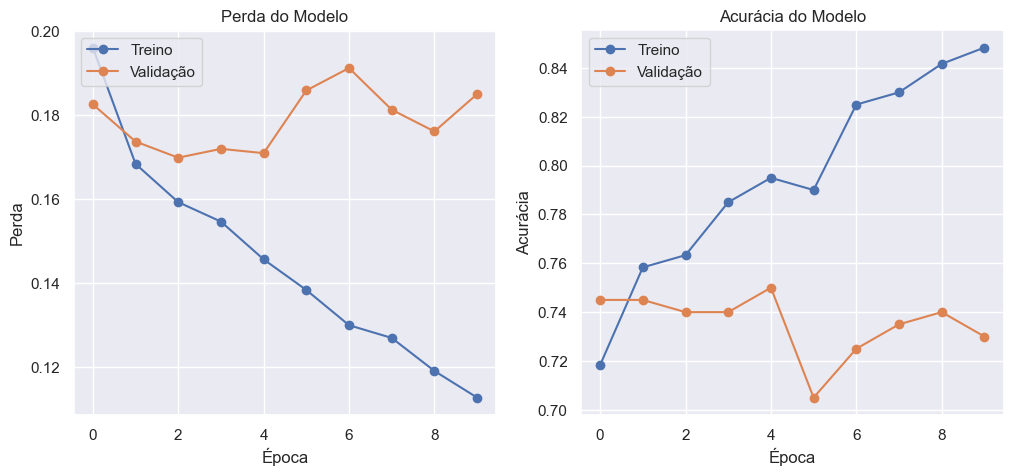

In [203]:
idBestParam = dfResultado["acuracia"].idxmax(axis=0)
bestParam = params[idBestParam]
bestParam

# Instanciar o classificador MLP
mlp = MLPClassifier(
    input_shape=(x_train.shape[1],),
    num_classes=2,
    hidden_layers=bestParam[0],
    activation=bestParam[1],
    optimizer=bestParam[2],
    epochs=bestParam[3],
    batch_size=bestParam[4],
)

# Treinar o modelo
mlp.train(x_train, y_train, x_val, y_val)

# Avaliar o modelo
results.append(mlp.evaluate(x_test, y_test))

# Plotar as métricas
mlp.plot_metrics()

In [215]:
dfResultado.iloc[idBestParam]

perda                  0.152662
acuracia                  0.805
hidden_layers    [256, 128, 64]
activation                 tanh
optimizer               rmsprop
epochs                       10
batch_size                   32
Name: 220, dtype: object

### Base Desconhecida

In [202]:
# Carregar a base de dados German Credit
url = "./datasets/base_desconhecida_preprocessada.csv"

data = pd.read_csv(url, header=True)
data

# # Pre-processamento dos dados
# # Codificar variáveis categóricas
# for col in data.select_dtypes(include=["object"]).columns:
#     le = LabelEncoder()
#     data[col] = le.fit_transform(data[col])

# # Separar as features e o target
# X = data.drop("target", axis=1)
# y = data["target"] - 1  # Ajustar as labels para que sejam 0 e 1

# # Normalizar as features
# scaler = StandardScaler()
# X = scaler.fit_transform(X)


# # Dividir os dados em treino (60%), validação (20%) e teste (20%)
# x_temp, x_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# x_train, x_val, y_train, y_val = train_test_split(
#     x_temp, y_temp, test_size=0.25, random_state=42
# )

# # Transformar as labels em categorias one-hot
# y_train = to_categorical(y_train, 2)
# y_test = to_categorical(y_test, 2)
# y_val = to_categorical(y_val, 2)

# params, cols = grid_params()
# results = []

# for p1, p2, p3, p4, p5 in params:
#     # Instanciar o classificador MLP
#     mlp = MLPClassifier(
#         input_shape=(x_train.shape[1],),
#         num_classes=2,
#         hidden_layers=p1,
#         activation=p2,
#         optimizer=p3,
#         epochs=p4,
#         batch_size=p5
#     )

#     # Treinar o modelo
#     mlp.train(x_train, y_train, x_val, y_val)

#     # Avaliar o modelo
#     loss,accuracy=mlp.evaluate(x_test, y_test)
#     results.append((loss,accuracy,p1, p2, p3, p4, p5))

# dfResultado = pd.DataFrame(results,columns=["perda","acuracia"]+list(cols))
# dfResultado.sort_values("acuracia",ascending=False)

TypeError: Passing a bool to header is invalid. Use header=None for no header or header=int or list-like of ints to specify the row(s) making up the column names

In [31]:
dfGermanCredit

,status,month,credit_history,purpose,credit_amount,savings,employment,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,target
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,A42,1736,A61,A74,3,A92,A101,...,A121,31,A143,A152,1,A172,1,A191,A201,1
996,A11,30,A32,A41,3857,A61,A73,4,A91,A101,...,A122,40,A143,A152,1,A174,1,A192,A201,1
997,A14,12,A32,A43,804,A61,A75,4,A93,A101,...,A123,38,A143,A152,1,A173,1,A191,A201,1
998,A11,45,A32,A43,1845,A61,A73,4,A93,A101,...,A124,23,A143,A153,1,A173,1,A192,A201,2


In [ ]:
# Exemplo de uso com o conjunto de dados MNIST

# Carregar o conjunto de dados MNIST
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalizar as imagens de entrada para valores entre 0 e 1
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Transformar as labels em categorias one-hot
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Instanciar o classificador MLP
mlp = MLPClassifier(input_shape=(28, 28), num_classes=10)

# Treinar o modelo
mlp.train(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Avaliar o modelo
mlp.evaluate(x_test, y_test)
